In [1]:
"""
Loads all the performance data up and applys the one-fold structural test
on 100 points thorugh each performance.
"""
%matplotlib inline
from __future__ import print_function
import os
import time
import pandas as pd
import numpy as np
import time
import datetime
import sys
from metatone_post_hoc_analysis import *
from transition_matrices import *
import matplotlib.pyplot as plt
plt.style.use('ggplot')

### Loading Gesture Classifier.           ###
### Classifier file successfully loaded.  ###


In [2]:
"""Load up all the performances and do some stats"""
log_files = []
performances = []
for local_file in os.listdir("../data"):
    if local_file.endswith("-touches.csv"):
        log_files.append("../data/" + local_file)
print("Loading the performances.")
for log in log_files:
    try:
        performances.append(MetatoneTouchLog(log))
    except:
        print("Performance Analysis Failed for: " + log)
        raise
print("Done.")

Loading the performances.
Done.


Doing the one fold tests.


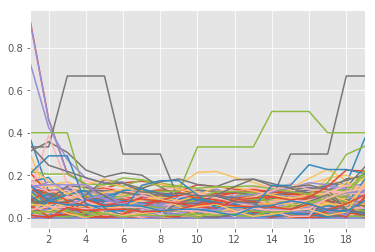

In [3]:
NUMBER_OF_DIVISIONS = 20
# Do the one fold division and test the difference in flux.
# This is running on group flux.
print("Doing the one fold tests.")
big_data = {}
for perf in performances:
    trans = perf.transitions
    data = {}
    for n in range(1,NUMBER_OF_DIVISIONS):
        n_hund = n/float(NUMBER_OF_DIVISIONS)
        a, b = one_fold_division(trans, n_hund, transition_sum)
        a = transition_matrix_to_normal_transition_matrix(transition_sum(a))
        b = transition_matrix_to_normal_transition_matrix(transition_sum(b))
        a = flux_measure(a)
        b = flux_measure(b)
        data[n] = abs(a - b)
    big_data[perf.performance_title] = data
    print("Processed: " + perf.performance_title, end='\r')
df = pd.DataFrame.from_dict(big_data)
df.plot(kind='line', subplots=False, legend=False)
#df.plot(kind='scatter', subplots=False, legend=False)

Doing the one fold tests.


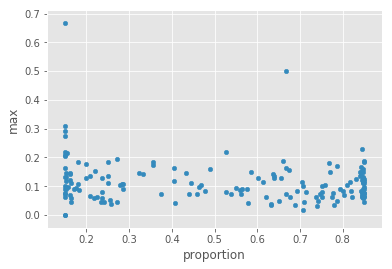

In [4]:
NUMBER_OF_DIVISIONS = 1000
RANGE_TRIM = 0.15
# Same test, just keep the max value from each performance
# Plot is a bit boring here as well.
# Max values bunched up at each edge...
print("Doing the one fold tests.")
big_data = {}
for perf in performances:
    trans = perf.transitions
    data = {}
    # Cut off the first and last 10%
    range_start = 0 + RANGE_TRIM
    range_length = 1 - (2 * RANGE_TRIM)
    for n in range(0,NUMBER_OF_DIVISIONS):
        n_hund = range_start + (range_length * n / float(NUMBER_OF_DIVISIONS))
        a, b = one_fold_division(trans, n_hund, transition_sum)
        a = transition_matrix_to_normal_transition_matrix(transition_sum(a))
        b = transition_matrix_to_normal_transition_matrix(transition_sum(b))
        a = flux_measure(a)
        b = flux_measure(b)
        data[n_hund] = abs(a - b)
    d = pd.DataFrame.from_dict(data, orient='index')[0]
    big_data[perf.performance_title] = {'proportion': d.idxmax(), 'max': d.max()}
    print("Processed: " + perf.performance_title, end='\r')
df = pd.DataFrame.from_dict(big_data, orient='index')
df.plot(kind='scatter', x='proportion', y='max')